# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np 
# is a Python library used for working with arrays.It also has functions for working in domain of linear algebra, fourier transform, and matrices
import matplotlib.pyplot as plt 
#is a comprehensive library for creating static, animated, and interactive visualizations in Python
import pandas as pd 
# is a Python package that provides fast, flexible,and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive
import warnings
#The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception)
warnings.filterwarnings('ignore')

## Importing the dataset

In [23]:
dataset = pd.read_csv('../data/Position_Salaries.csv')
dataset.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [38]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [39]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [40]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [27]:
y = y.reshape(len(y),1)
print(y.shape)

(10, 1)


In [29]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling or Standardization: It is a step of Data Pre Processing that is applied to independent variables or features of data. It helps to normalize the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [31]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [32]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

## Kernel Type	
Linear	Computationally efficient – Works well for high-dimensional data	
Radial Basis Function (RBF)	Effective for capturing complex nonlinear relationships
Polynomial	It is useful for problems with polynomial behavior and can also capture nonlinear relationships in the data	
Sigmoid	Can be effective in specific applications, such as neural networks

In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')#Radial Basis Function (RBF) Kernel is suitable for nonlinear problems and is the default choice for SVM
regressor.fit(X, y)

SVR()

## Predicting a new result

In [35]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

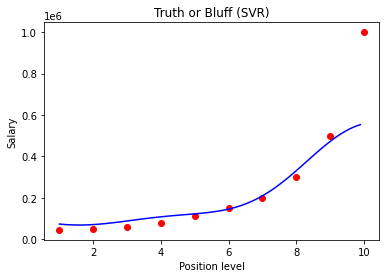

In [37]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()